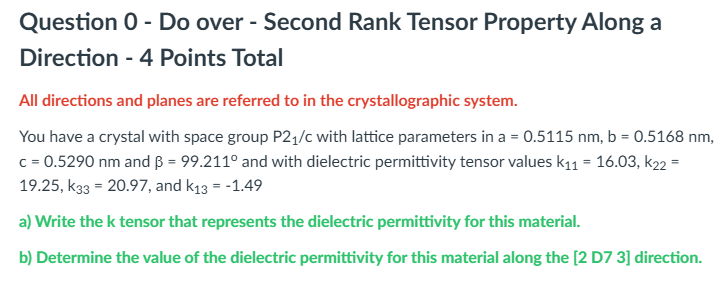

In [10]:
#solution to question0
#UFID = 8 0 7 7 3 6 5 3 = D1 D2 D3 D4 D5 D6 D7 D8
import numpy as np
import math

# Lattice parameters
a = 0.5115
b = 0.5168
c = 0.5290
# Angles
alpha = 90
beta = 99.211
gamma = 90

# Metric tensor
m_t = np.array([
    [a**2, a*b*math.cos(math.radians(gamma)), a*c*math.cos(math.radians(beta))],
    [b*a*math.cos(math.radians(gamma)), b**2, b*c*math.cos(math.radians(alpha))],
    [c*a*math.cos(math.radians(beta)), c*b*math.cos(math.radians(alpha)), c**2]
])

# Basis vectors
u = np.array([1, 0, 0])
v = np.array([0, 1, 0])
w = np.array([0, 0, 1])

# Rotation vector (target direction)
n_vec = np.array([2, 5, 3])

# Grouping basis vectors
basis_vec = [u, v, w]

# Function to compute the metric-based dot product between two vectors
def rotation_element(vec1, m_t, vec2):
    numerator = np.dot(vec1, np.dot(m_t, vec2.T))  # Metric-based dot product
    norm_1 = math.sqrt(np.dot(vec1, np.dot(m_t, vec1.T)))  # Metric norm of vec1
    norm_2 = math.sqrt(np.dot(vec2, np.dot(m_t, vec2.T)))  # Metric norm of vec2
    return numerator / (norm_1 * norm_2)

# Calculate the rotation matrix row by computing the dot product of n_vec with each basis vector
rotation_matrix_row = [rotation_element(orig, m_t, n_vec) for orig in basis_vec]

# Convert to a NumPy array (1x3 row vector)
rotation_matrix = np.array([rotation_matrix_row])
#print('rotation matrix is:\n',rotation_matrix)

# Dielectric permittivity tensor
k = np.array([
    [16.03, 0.0, -1.49],
    [0.0, 19.25, 0.0],
    [-1.49, 0.0, 20.97]
])

print("The dielectric permittivity tensor for the given monoclinic system is:\n", k)


# Calculate the transformed dielectric permittivity along the [253] direction
# The transformation uses both the rotation matrix and its transpose
k_transformed = np.matmul(rotation_matrix, np.matmul(k, rotation_matrix.T))

print("The transformed dielectric permittivity along the [253] direction is:\n", k_transformed[0, 0])


The dielectric permittivity tensor for the given monoclinic system is:
 [[16.03  0.   -1.49]
 [ 0.   19.25  0.  ]
 [-1.49  0.   20.97]]
The transformed dielectric permittivity along the [253] direction is:
 18.22884404662721
